##Libraries ##

In [39]:
#import libraries
import math
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from keras import models,layers
import seaborn as sns
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
!pip install fitter
from fitter import Fitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


***Explaining variables in the database***

id :a notation for a house

date: Date house was sold

price: Price is prediction target

bedrooms: Number of Bedrooms/House

bathrooms: Number of bathrooms/bedrooms

sqft_living: square footage of the home

sqft_lot: square footage of the lot

floors :Total floors (levels) in house

waterfront :House which has a view to a waterfront

view: Has been viewed

condition :How good the condition is Overall

grade: overall grade given to the housing unit, based on King County grading system

sqft_above :square footage of house apart from basement

sqft_basement: square footage of the basement

yr_built :Built Year

yr_renovated :Year when house was renovated

zipcode:zip code

lat: Latitude coordinate

long: Longitude coordinate

sqft_living15 :Living room area in 2015(implies-- some renovations) This might or might not have affected the lotsize area

sqft_lot15 :lotSize area in 2015(implies-- some renovations)

##*Explority Data Analysis*

In [40]:
#Importing dataset 
df=pd.read_csv('/content/kc_house_data.csv',parse_dates=['date'])
df.head(5)


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


*we look for null values*

In [41]:
df.isnull().values.any()

False

*we can see a summary of our data with the next command*

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  int64         
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  int64         
 6   sqft_lot       21613 non-null  int64         
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

*descriptive statics of our data*

In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


*Let's find what type of variables we are dealing with*

In [44]:
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

*We can identify that there's not categorical*

*our target variable is the price so let's see how it's change over time*

(array([16191., 16252., 16314., 16375., 16436., 16495., 16556.]),
 [Text(16191.0, 0, '2014-05'),
  Text(16252.0, 0, '2014-07'),
  Text(16314.0, 0, '2014-09'),
  Text(16375.0, 0, '2014-11'),
  Text(16436.0, 0, '2015-01'),
  Text(16495.0, 0, '2015-03'),
  Text(16556.0, 0, '2015-05')])

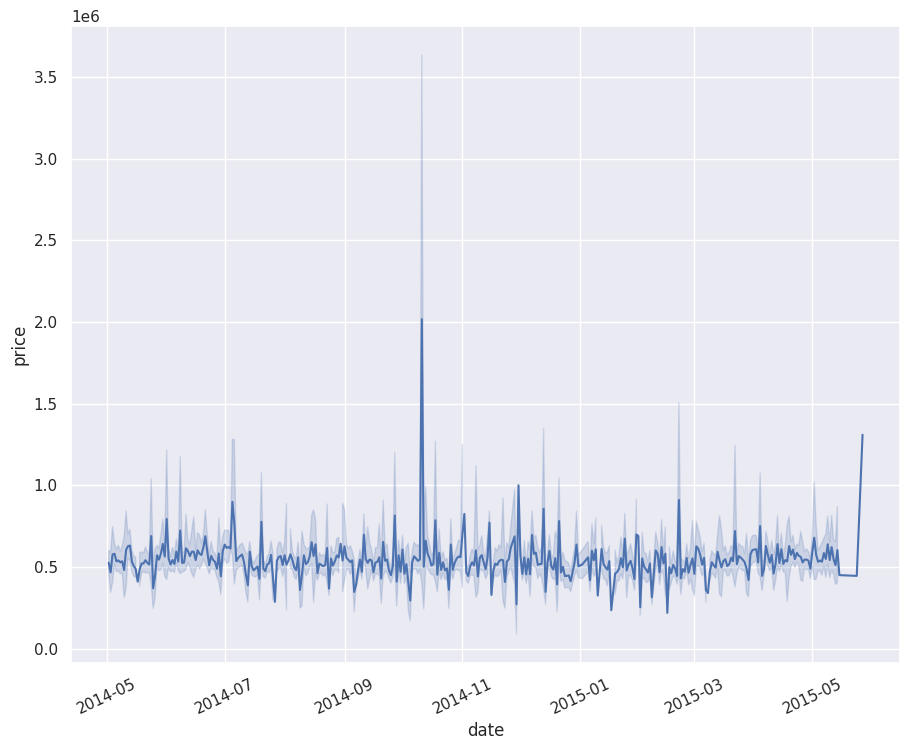

In [45]:
sns.set(rc={'figure.figsize':(10.7,8.27)})
sns.lineplot(x = "date", y = "price",
             data = df)
plt.xticks(rotation = 25)

*We can see an anomaly betwwen 2014-09 and 2014-11*

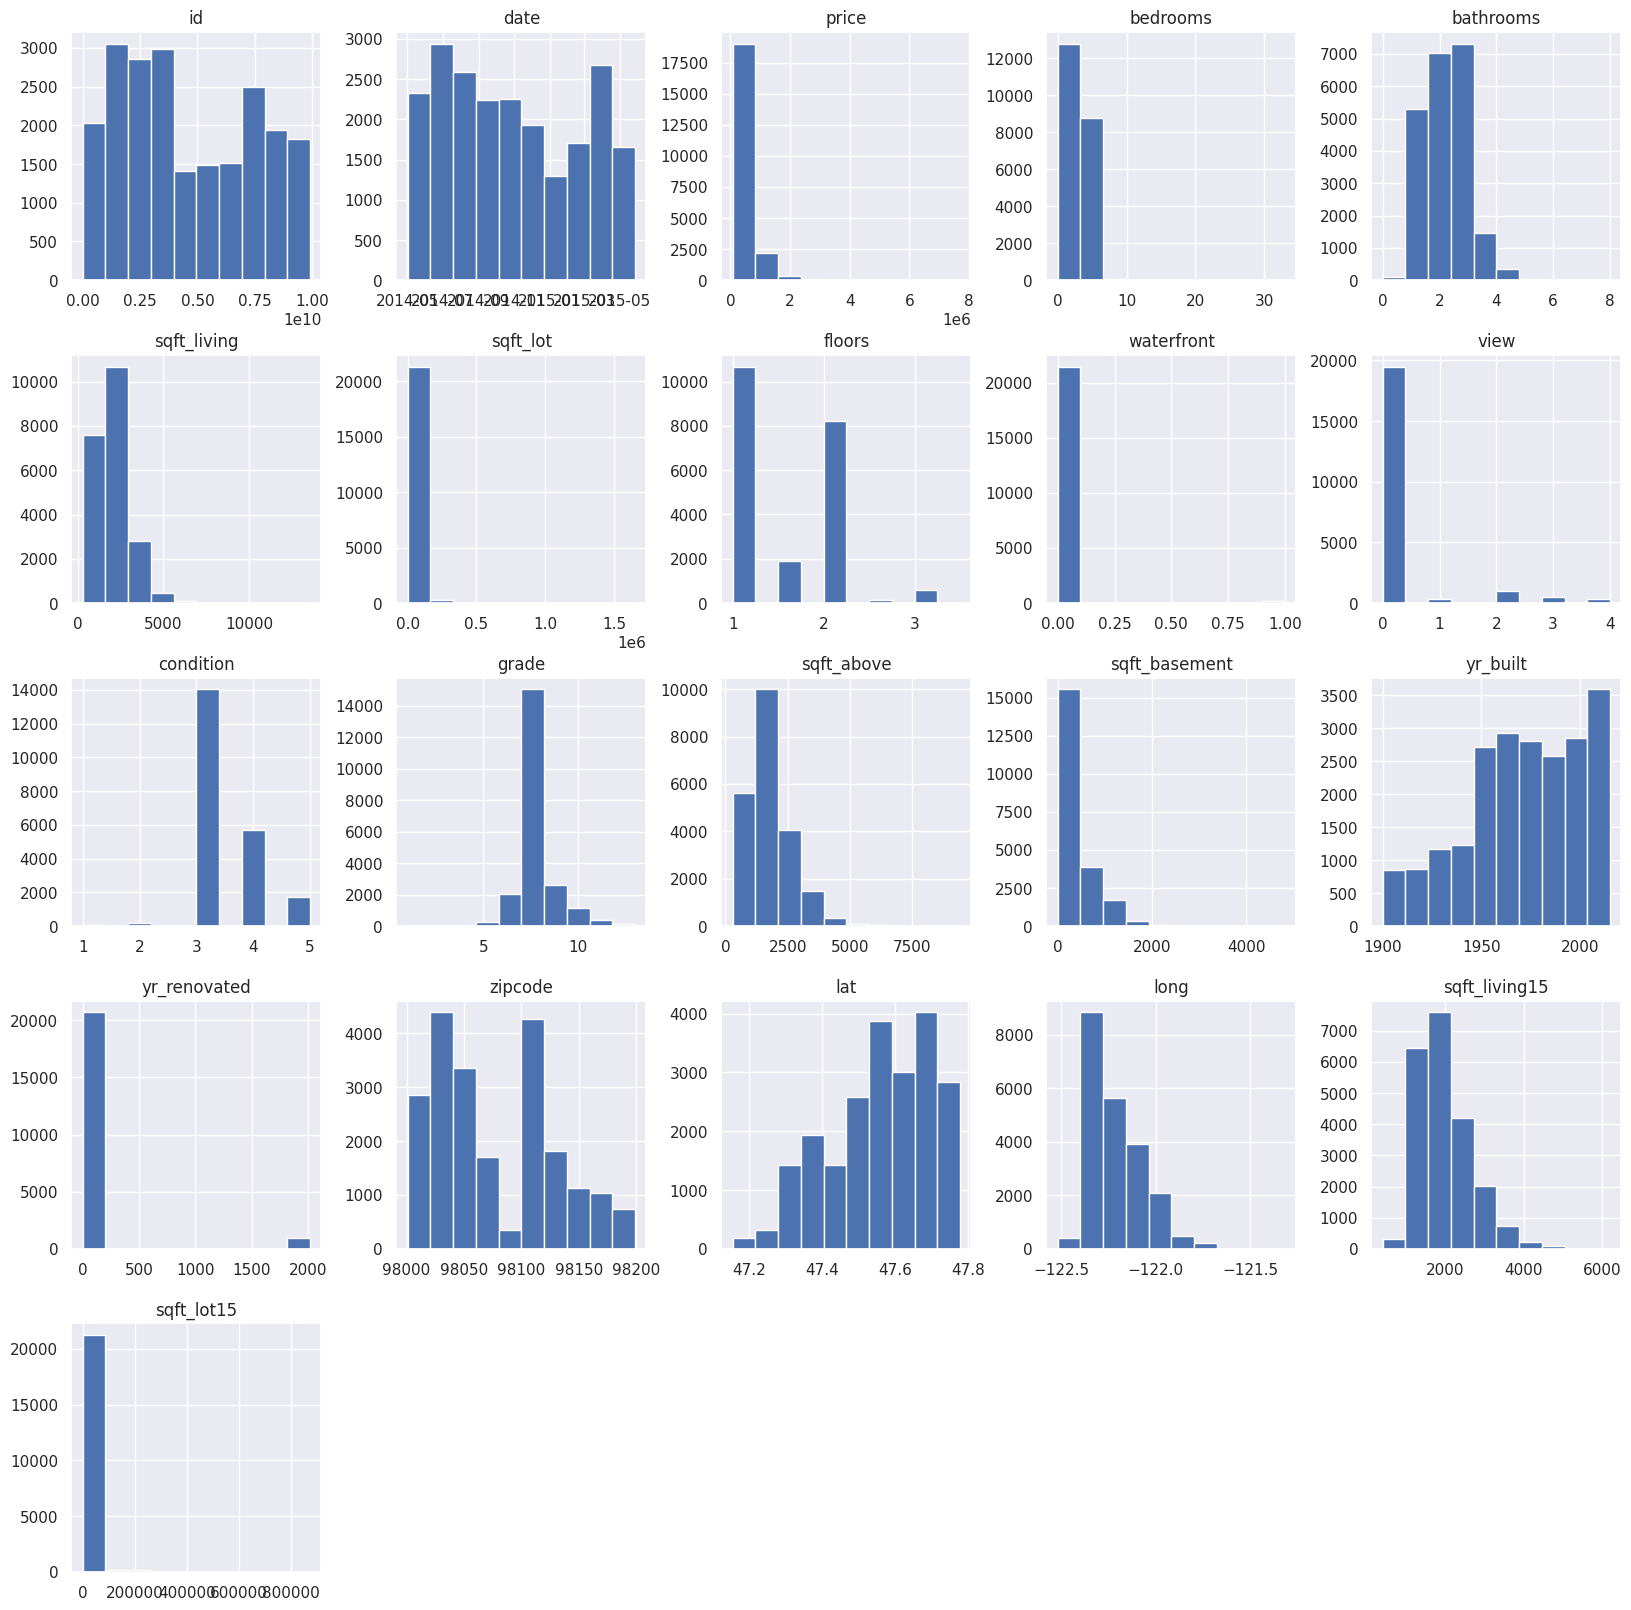

In [46]:
df.hist(figsize=(20,20))
plt.show()

*let's see the relation between our features and our target variable*

<Figure size 1070x827 with 0 Axes>

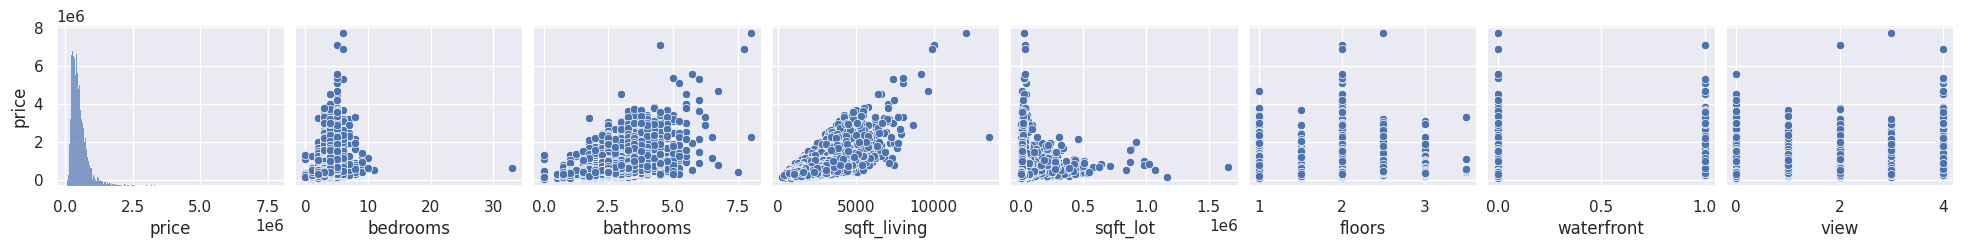

<Figure size 1070x827 with 0 Axes>

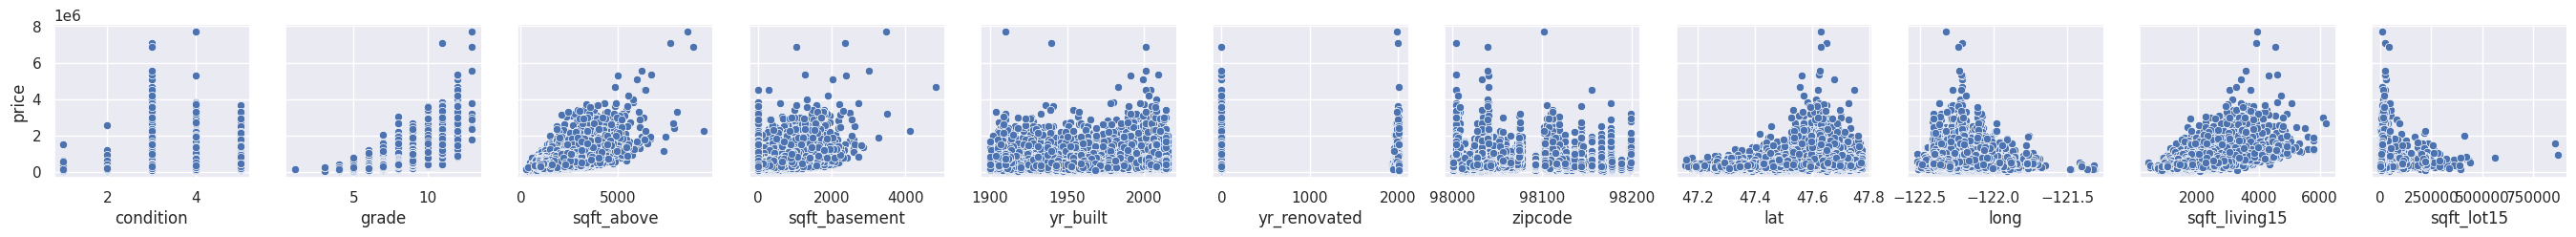

In [47]:
plt.figure()
cols_to_plot = df.columns[2:10] # explicitly add the column "Outcome" to your list of columns to plot
sns.pairplot(df,x_vars=cols_to_plot,y_vars='price',diag_kind='hist')
plt.show()

plt.figure()
cols_to_plot = df.columns[10:] # explicitly add the column "Outcome" to your list of columns to plot
sns.pairplot(df,x_vars=cols_to_plot,y_vars='price',diag_kind='hist')
plt.show()

*let's plot the distribution function of our target variable*

<ipython-input-48-9ad9820858cb>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.price, color='b',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)


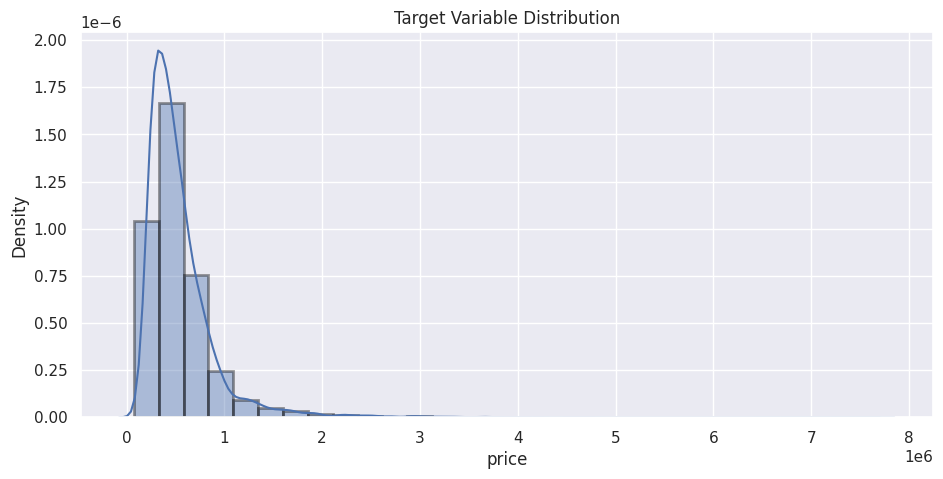

In [48]:

plt.figure(figsize=[11,5])
sns.distplot(df.price, color='b',hist_kws=dict(edgecolor="black", linewidth=2), bins=30)
plt.title('Target Variable Distribution')
plt.show()

*let's find the distribution of our target variable using fitter module the summary method provides a list of the best performing models ascendingly with respect to the sum of squares error*

Fitting 5 distributions: 100%|██████████| 5/5 [00:02<00:00,  2.37it/s]


,sumsquare_error,aic,bic,kl_div,ks_statistic,ks_pvalue
norm,3.909172e-12,1.465891e+04,-783424.178427,inf,0.145727,0.0
beta,7.796307e-12,4.269529e+03,-768484.233636,inf,0.234325,0.0
uniform,1.558549e-11,3.173389e+03,-753533.082508,inf,0.810905,0.0
lognorm,1.586169e-11,3.779693e+03,-753143.440786,inf,0.784323,0.0
gamma,1.730546e-11,inf,-751260.618576,NaN,0.999954,0.0


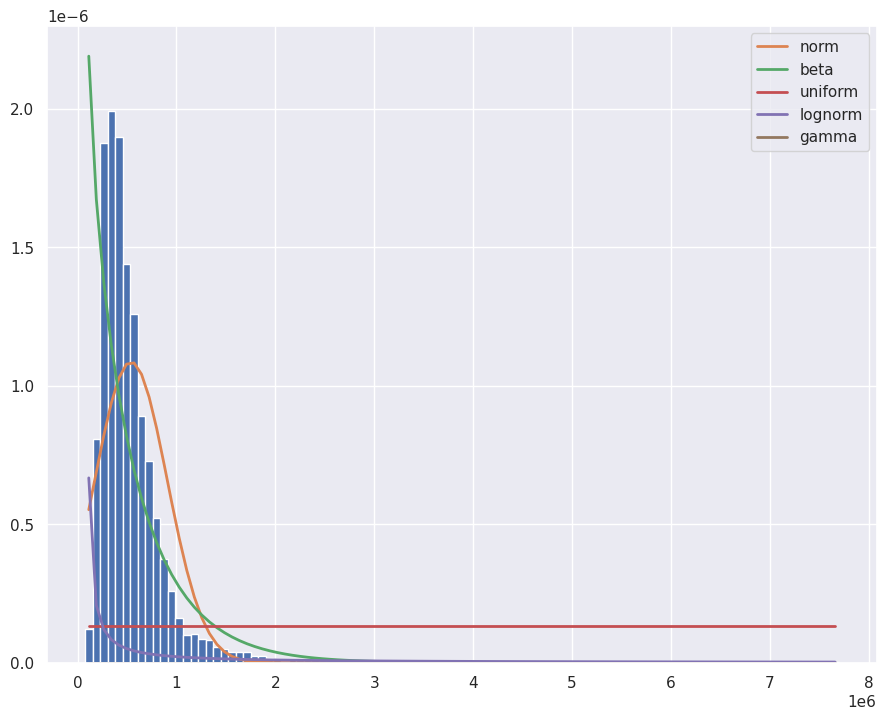

In [49]:

dist_fitter = Fitter(df.price,
                     distributions = ["uniform",
                                      "beta",
                                      "gamma",
                                      "lognorm",
                                      "norm",])

dist_fitter.fit()
dist_fitter.summary()      
     

In [50]:
mean,var=dist_fitter.fitted_param["norm"]
print(f'the mean of the Weekly sales probability distribution is: {mean}\nthe var of the Weekly sales probabily distribution is:{var}')

the mean of the Weekly sales probability distribution is: 540088.1417665294
the var of the Weekly sales probabily distribution is:367118.7031813723


*we are now looking for the correlation between the features and our target variable*

In [51]:
correlations=df.corr()
correlations['price']

<ipython-input-51-549efbb0870b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations=df.corr()


id              -0.016762
price            1.000000
bedrooms         0.308350
bathrooms        0.525138
sqft_living      0.702035
sqft_lot         0.089661
floors           0.256794
waterfront       0.266369
view             0.397293
condition        0.036362
grade            0.667434
sqft_above       0.605567
sqft_basement    0.323816
yr_built         0.054012
yr_renovated     0.126434
zipcode         -0.053203
lat              0.307003
long             0.021626
sqft_living15    0.585379
sqft_lot15       0.082447
Name: price, dtype: float64

*let's plot a heatmap to visualize this linear correlation*

<ipython-input-52-26ca6c582773>:15: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=df.corr()


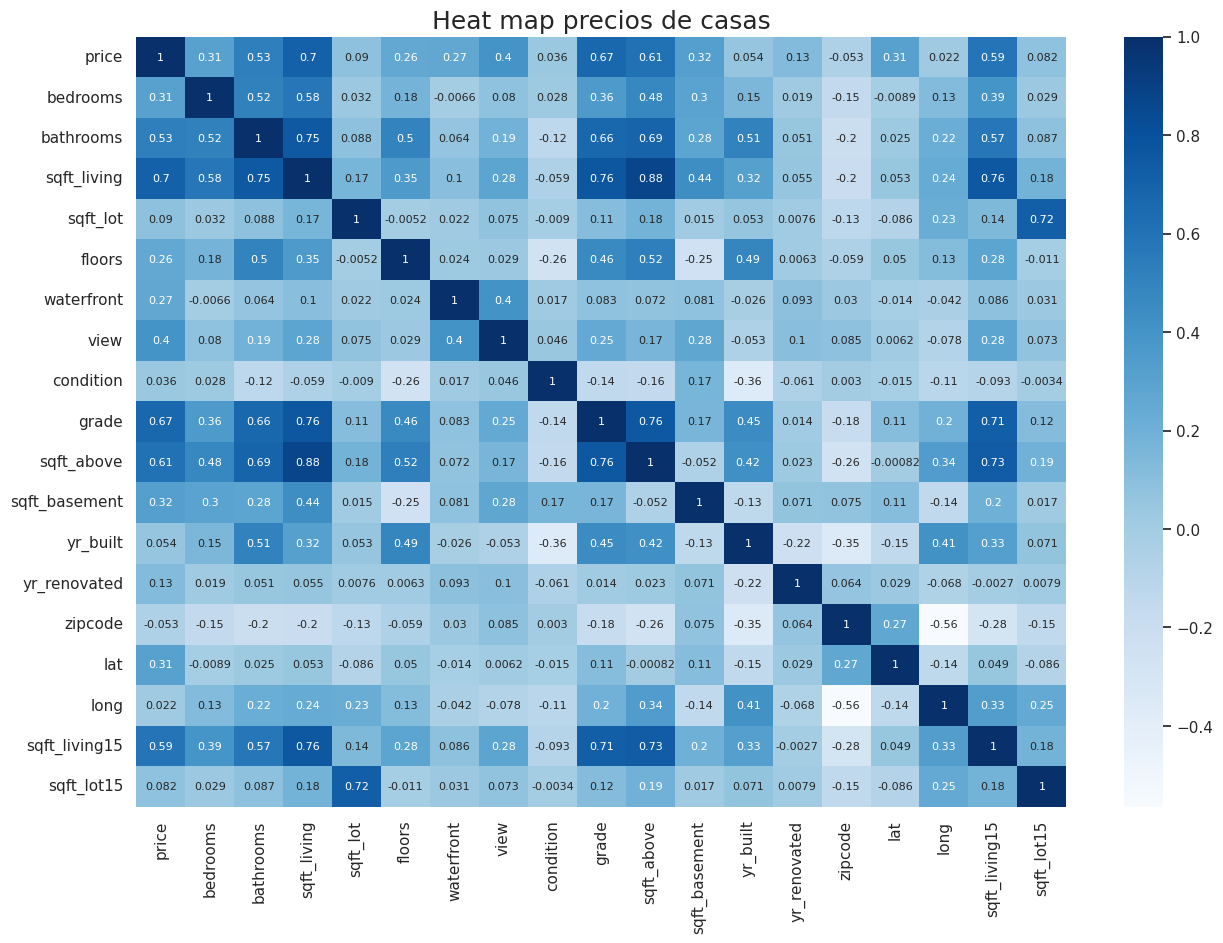

In [52]:
fig, ax = plt.subplots(figsize=(15,10))
title = "Heat map precios de casas"

# Set the font size and the distance of the title from the plot
plt.title(title,fontsize=18)
ttl = ax.title
ttl.set_position([0.5,1.05])


ax.set_xticks([])
ax.set_yticks([])

# Borramos la columna de id para poder hacer el mapa de calor del precio de las casas
df=df.drop(df.columns[[0]],axis=1)
correlation=df.corr()
sns.heatmap(correlation, cmap="Blues", annot=True, annot_kws={'size': 8})
plt.show()

*we are going to delete variables highly correlated to our output variable*


In [53]:
corr_matrix = df.corr()

# Seleccionar la columna de la variable objetivo
target_col = 'price'
target_corr = corr_matrix[target_col]

# Crear una máscara booleana para seleccionar las columnas con una correlación mayor a 0.5
mask = target_corr.abs() < 0.7
mask['price']=True
print(mask)
# Seleccionar solo las columnas que cumplen con el criterio de correlación
df = df.drop(df.columns[[0]],axis=1)
selected_cols = df.columns[mask]
# Crear un nuevo DataFrame solo con las columnas seleccionadas
new_df = df[selected_cols]
print(new_df.columns)

price             True
bedrooms          True
bathrooms         True
sqft_living      False
sqft_lot          True
floors            True
waterfront        True
view              True
condition         True
grade             True
sqft_above        True
sqft_basement     True
yr_built          True
yr_renovated      True
zipcode           True
lat               True
long              True
sqft_living15     True
sqft_lot15        True
Name: price, dtype: bool
Index(['price', 'bedrooms', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
       'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')


<ipython-input-53-e8986ca33b23>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


*we split our data in train and test set*

In [54]:
X=new_df.drop('price',axis=1)
y=df['price']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.1)
print((X_train.shape))
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(19451, 17)
(2162, 17)
(19451,)
(2162,)


*Normalization L2(MSE)*



In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# fit and transfrom
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# everything has been scaled between 1 and 0
print('Max: ',X_train.max())
print('Min: ', X_train.min())
# x_train=x_train/np.linalg.norm(x_train)
# x_dev=x_dev/np.linalg.norm(x_dev)
# print(x_train.shape,y_train.shape)
# print(x_dev.shape,y_dev.shape)

Max:  1.0
Min:  0.0


# *non linear regression neural network using keras*

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam

In [57]:
model = Sequential()

model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(20,activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam',loss='mse')

In [58]:

model.fit(X_train,y_train,batch_size=100,epochs=400,validation_data=(X_test,y_test))

Epoch 1/400
195/195 [==============================] - 3s 4ms/step - loss: 425988718592.0000 - val_loss: 425359540224.0000
Epoch 2/400
195/195 [==============================] - 1s 4ms/step - loss: 352063913984.0000 - val_loss: 182291628032.0000
Epoch 3/400
195/195 [==============================] - 1s 5ms/step - loss: 109699219456.0000 - val_loss: 98881413120.0000
Epoch 4/400
195/195 [==============================] - 1s 3ms/step - loss: 97144627200.0000 - val_loss: 95290523648.0000
Epoch 5/400
195/195 [==============================] - 0s 3ms/step - loss: 93072113664.0000 - val_loss: 90829594624.0000
Epoch 6/400
195/195 [==============================] - 1s 3ms/step - loss: 87820886016.0000 - val_loss: 85753454592.0000
Epoch 7/400
195/195 [==============================] - 0s 2ms/step - loss: 81752850432.0000 - val_loss: 79234424832.0000
Epoch 8/400
195/195 [==============================] - 0s 1ms/step - loss: 75007385600.0000 - val_loss: 72595668992.0000
Epoch 9/400
195/195 [======

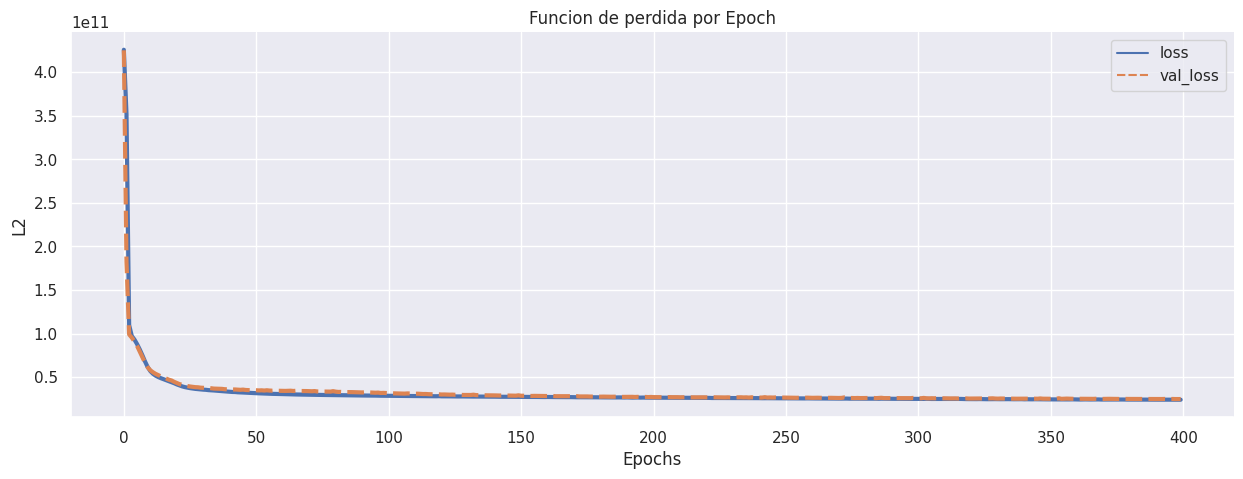

In [59]:
losses = pd.DataFrame(model.history.history)

plt.figure(figsize=(15,5))
sns.lineplot(data=losses,lw=3)
plt.xlabel('Epochs')
plt.ylabel('L2')
plt.title('Funcion de perdida por Epoch')
sns.despine()

68/68 [==============================] - 0s 1ms/step
MAE:  98334.76006735662
MSE:  24713901605.434105
RMSE:  157206.55713243678
Puntaje de Varianza (dispersion entre mi prediccion y mis resultados reales 0.8162780333392492


Descriptive Statistics:
 count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


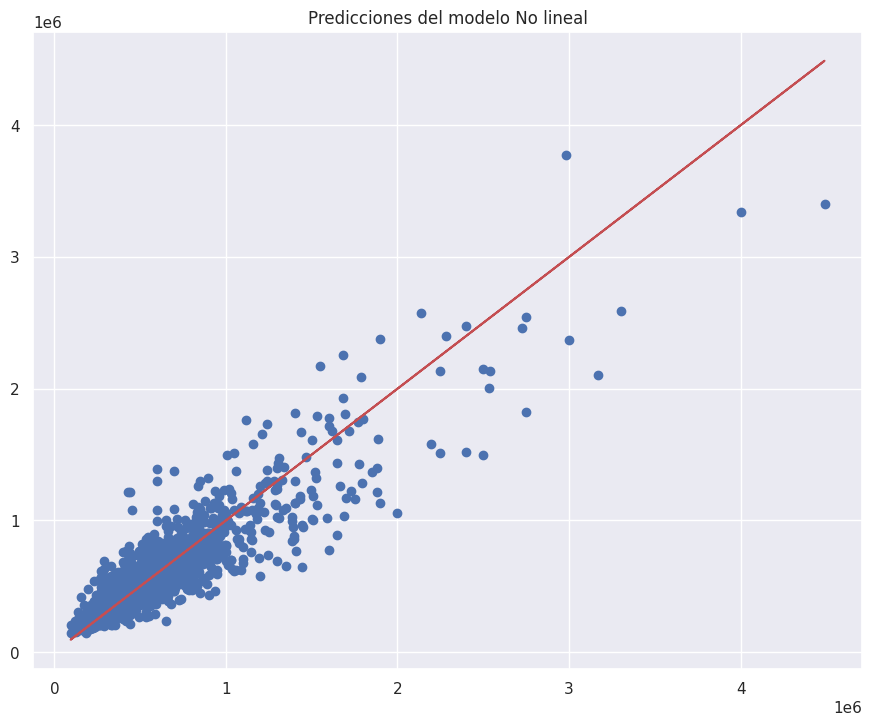

In [60]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

predictions = model.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,predictions))
print('MSE: ',mean_squared_error(y_test,predictions))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions)))
print('Puntaje de Varianza (dispersion entre mi prediccion y mis resultados reales' ,explained_variance_score(y_test,predictions))

print('\n\nDescriptive Statistics:\n',df['price'].describe())
plt.scatter(y_test,predictions)
plt.plot(y_test,y_test,'r')
plt.title("Predicciones del modelo No lineal")
plt.show()


## graph error distribution

<ipython-input-61-3b581029330c>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors)


<Axes: xlabel='price', ylabel='Density'>

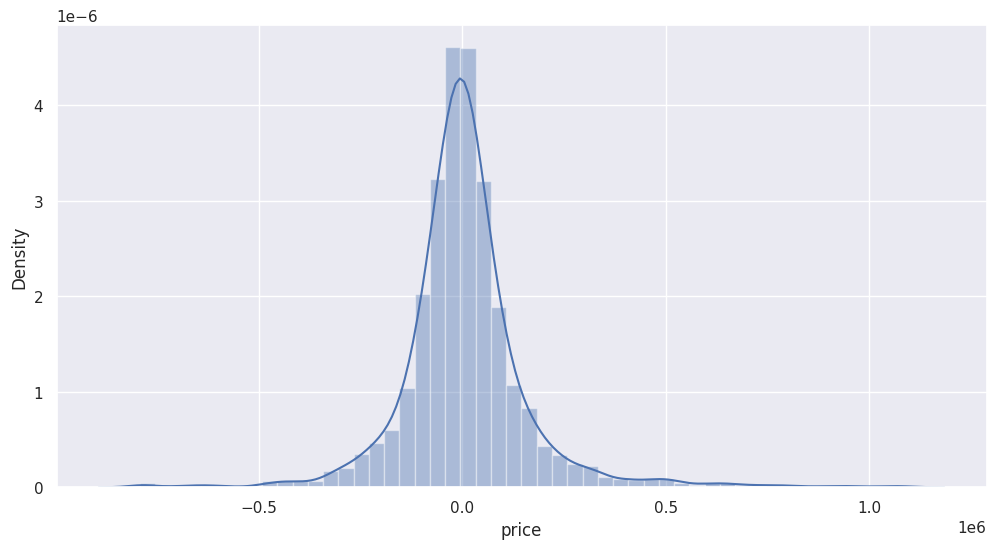

In [61]:
errors = y_test - predictions.flatten()
plt.figure(figsize=(12,6))
sns.distplot(errors)

# *Linear regression*

##Neural network using keras

In [62]:
model2 = Sequential()

model2.add(Dense(20))
model2.add(Dense(20))
model2.add(Dense(20))
model2.add(Dense(20))
model2.add(Dense(20))
model2.add(Dense(1))

model2.compile(optimizer='adam',loss='mse')
model2.fit(X_train,y_train,batch_size=108,epochs=300,validation_data=(X_test,y_test))

Epoch 1/300
181/181 [==============================] - 2s 3ms/step - loss: 415589892096.0000 - val_loss: 343549575168.0000
Epoch 2/300
181/181 [==============================] - 1s 3ms/step - loss: 142530658304.0000 - val_loss: 98024554496.0000
Epoch 3/300
181/181 [==============================] - 0s 2ms/step - loss: 95104466944.0000 - val_loss: 91899248640.0000
Epoch 4/300
181/181 [==============================] - 0s 2ms/step - loss: 88319066112.0000 - val_loss: 85108678656.0000
Epoch 5/300
181/181 [==============================] - 0s 2ms/step - loss: 80626622464.0000 - val_loss: 77288603648.0000
Epoch 6/300
181/181 [==============================] - 0s 1ms/step - loss: 71979384832.0000 - val_loss: 68926251008.0000
Epoch 7/300
181/181 [==============================] - 0s 2ms/step - loss: 63247400960.0000 - val_loss: 61735522304.0000
Epoch 8/300
181/181 [==============================] - 0s 2ms/step - loss: 56570871808.0000 - val_loss: 57091522560.0000
Epoch 9/300
181/181 [========

68/68 [==============================] - 0s 697us/step
MAE:  129451.6136542787
MSE:  41487551259.01614
RMSE:  203684.93134990655
Puntaje de Varianza (dispersion entre mi prediccion y mis resultados reales 0.6920037719944032


Descriptive Statistics:
 count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


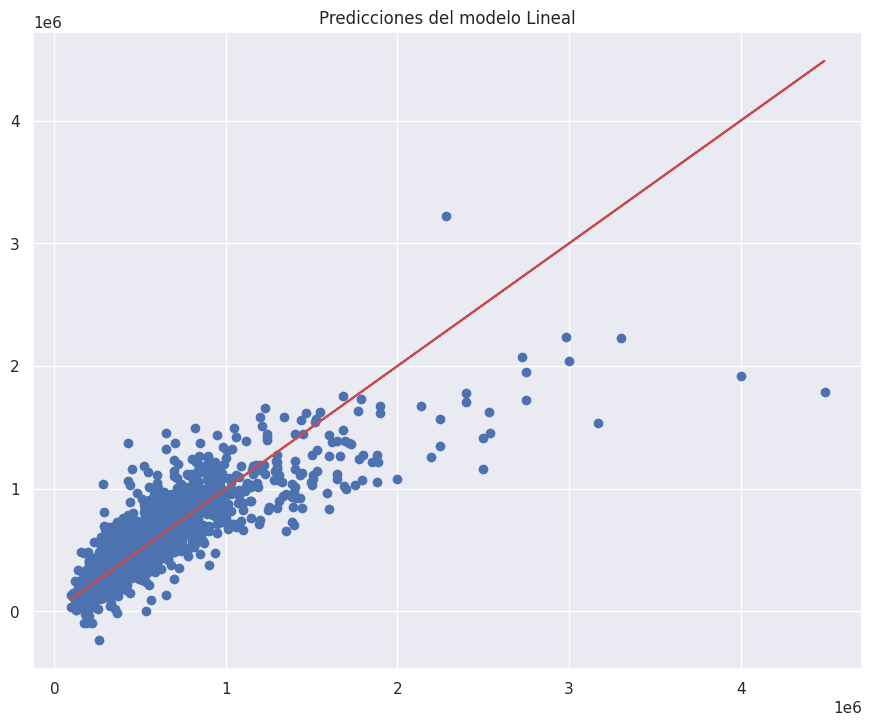

In [63]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix

predictions2 = model2.predict(X_test)

print('MAE: ',mean_absolute_error(y_test,predictions2))
print('MSE: ',mean_squared_error(y_test,predictions2))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,predictions2)))
print('Puntaje de Varianza (dispersion entre mi prediccion y mis resultados reales' ,explained_variance_score(y_test,predictions2))

print('\n\nDescriptive Statistics:\n',df['price'].describe())
plt.scatter(y_test,predictions2)
plt.title("Predicciones del modelo Lineal")
plt.plot(y_test,y_test,'r')
plt.show()

<ipython-input-64-1056b764908a>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors)


<Axes: xlabel='price', ylabel='Density'>

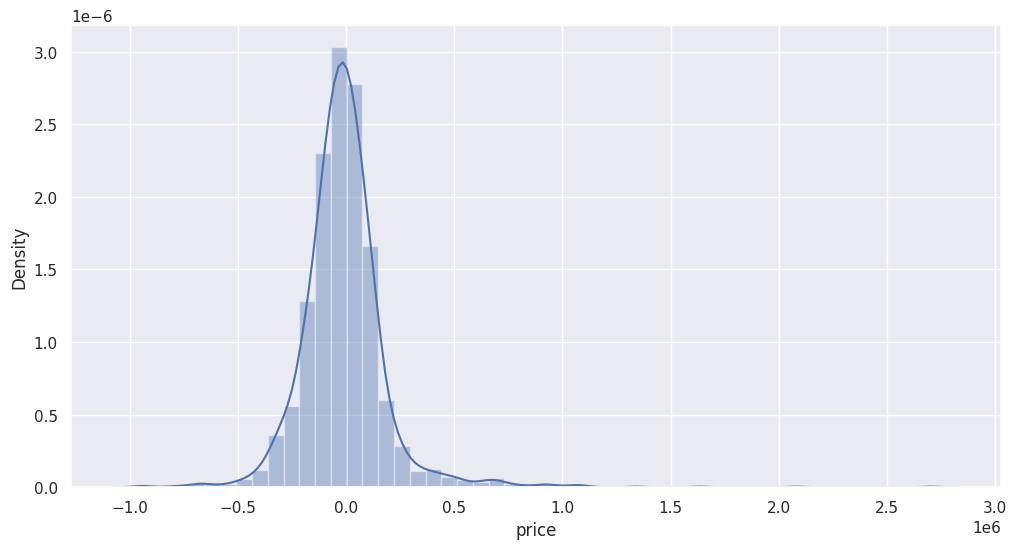

In [64]:
errors = y_test - predictions2.flatten()
plt.figure(figsize=(12,6))
sns.distplot(errors)

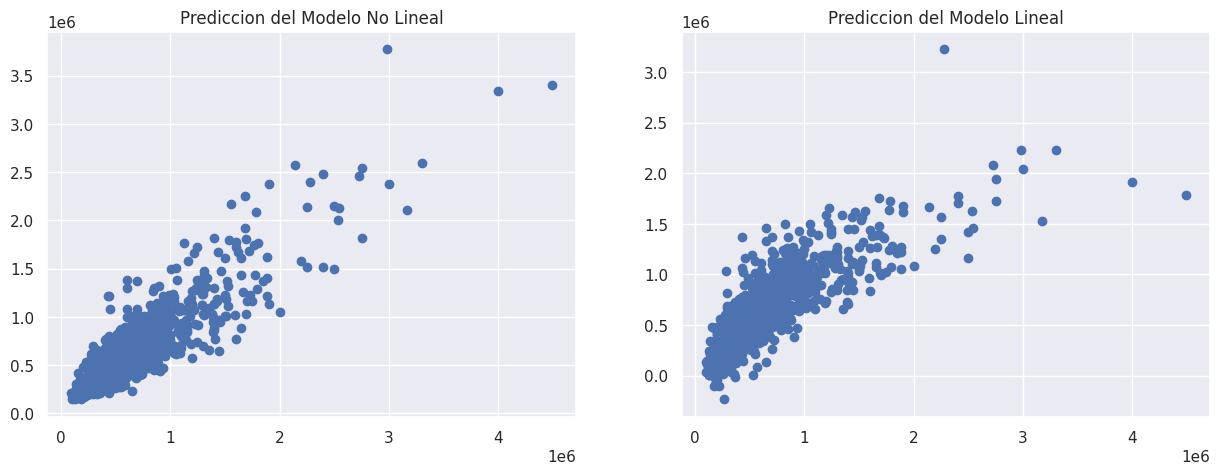

In [65]:
#plot 1:
plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.scatter(y_test,predictions)
plt.title('Prediccion del Modelo No Lineal')

#plot 2:

plt.subplot(1, 2, 2)
plt.scatter(y_test,predictions2)
plt.title('Prediccion del Modelo Lineal')
plt.show()


##linear regression using numpy



In [66]:
#DEFINIMOS LOS HIPERPARAMETROS

# DEFINIMOS EL MODELO DE REGRESION LINEAL 
def linear_regression(x, weights, bias):
    return np.dot(x, weights) + bias

# DEFINMOS EL ERRO CUADRATICO MEDIO
def mse_loss(y, y_pred):
    return np.mean(np.square(y - y_pred))

# DEFINIMOS EL GRADIENTE DESCIENTE
def gradient_descent(x, y, y_pred, weights, bias, learning_rate):
    dw = np.dot(x.T, (y_pred - y)) / len(y)
    db = np.mean(y_pred - y)
    #-------------ACTUALIZAMOS LOS PESOS-----------#
    weights -= learning_rate * dw
    bias -= learning_rate * db
    return weights, bias

# ENTRENAMOS EL MODEL
def modelo(X_train,Y_test,epochs,learning_rate):
  weights = np.random.randn(17,1)*0.01
  bias = np.zeros(1)
  losses=[]
  epochs_s=[]
  for i in range(epochs):
      # Forward pass
      y_pred = linear_regression(X_train, weights, bias)
      
      # CALCULAMOS LA PERDIDA
      loss = mse_loss(Y_test, y_pred)

      
      # REALIZAMOS EL BACKPROPAGATION
      weights, bias = gradient_descent(X_train, Y_test, y_pred, weights, bias, learning_rate)
      
      # IMPRIMIMOS LA PERDIDA CADA 10 EPOCHS
      if i % 10 == 0:
          print(f"Epoch {i}: loss={loss}")
          losses.append(loss)
          epochs_s.append(i)

  print(f' el error minimo {loss.min()}')
  return epochs_s,losses,y_pred

In [67]:
learning_rate = 0.01
epochs = 10000
y_t=y_train.values.reshape(19451,1)
epochs_s,losses,y_pred=modelo(X_train,y_t,epochs,learning_rate)

Epoch 0: loss=426303079065.84393
Epoch 10: loss=286338458692.8499
Epoch 20: loss=209260849885.6993
Epoch 30: loss=166716520729.20285
Epoch 40: loss=143136361292.18744
Epoch 50: loss=129971323557.80988
Epoch 60: loss=122527089867.40834
Epoch 70: loss=118225982980.09033
Epoch 80: loss=115652577380.26407
Epoch 90: loss=114029642520.0642
Epoch 100: loss=112930382194.63835
Epoch 110: loss=112120424600.30682
Epoch 120: loss=111471058754.25677
Epoch 130: loss=110911592435.00488
Epoch 140: loss=110403191828.81253
Epoch 150: loss=109924516824.18353
Epoch 160: loss=109463833320.54417
Epoch 170: loss=109014682078.50967
Epoch 180: loss=108573500474.3478
Epoch 190: loss=108138316598.11588
Epoch 200: loss=107708032177.912
Epoch 210: loss=107282028829.7731
Epoch 220: loss=106859951846.37749
Epoch 230: loss=106441591472.7022
Epoch 240: loss=106026817712.00175
Epoch 250: loss=105615544525.43254
Epoch 260: loss=105207710171.82375
Epoch 270: loss=104803266410.07166
Epoch 280: loss=104402172568.0537
Epoch

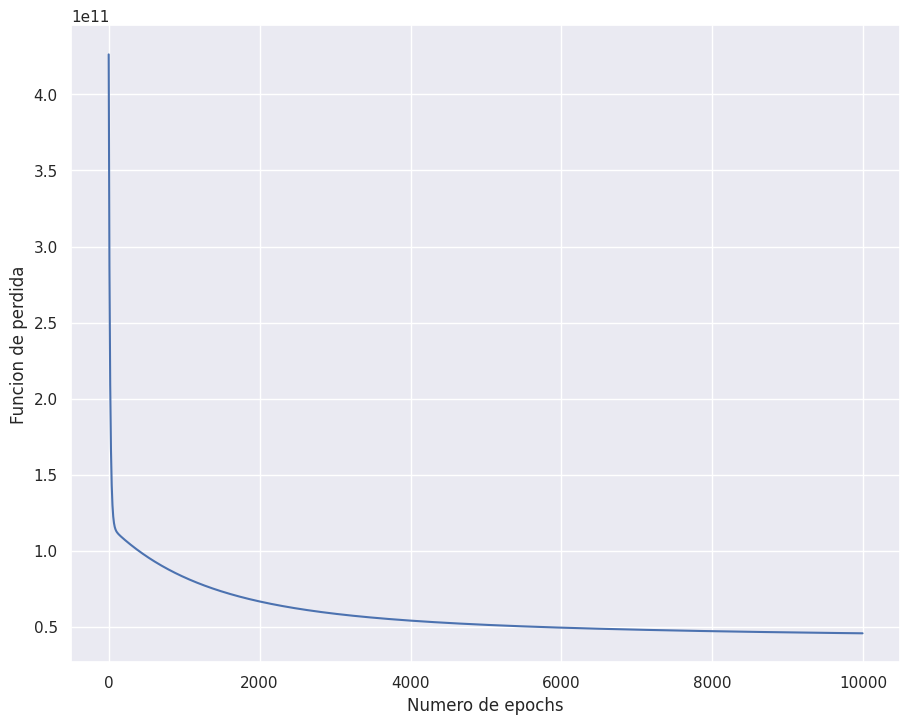

In [68]:
plt.plot(epochs_s,losses)
plt.xlabel('Numero de epochs')
plt.ylabel('Funcion de perdida')
plt.show()

In [69]:
y_t_2=y_test.values.reshape(2162,1)
epochs_s,losses,y_pred=modelo(X_test,y_t_2,epochs,learning_rate)

Epoch 0: loss=427985302912.6745
Epoch 10: loss=287129125159.9978
Epoch 20: loss=209423792516.36465
Epoch 30: loss=166460172065.93588
Epoch 40: loss=142610156156.9344
Epoch 50: loss=129276579475.77873
Epoch 60: loss=121730053416.40916
Epoch 70: loss=117368883902.46387
Epoch 80: loss=114761838555.9194
Epoch 90: loss=113121565418.94942
Epoch 100: loss=112014916466.1651
Epoch 110: loss=111203594296.48042
Epoch 120: loss=110556490626.27232
Epoch 130: loss=110001463003.68779
Epoch 140: loss=109498806797.19635
Epoch 150: loss=109026661924.41562
Epoch 160: loss=108572984975.07062
Epoch 170: loss=108131133008.7458
Epoch 180: loss=107697434163.29846
Epoch 190: loss=107269851223.45465
Epoch 200: loss=106847246435.44081
Epoch 210: loss=106428977071.84769
Epoch 220: loss=106014672944.86682
Epoch 230: loss=105604114010.82927
Epoch 240: loss=105197163035.82988
Epoch 250: loss=104793728550.96104
Epoch 260: loss=104393744470.17078
Epoch 270: loss=103997158874.43265
Epoch 280: loss=103603927838.44586
Ep

MAE:  127326.93638116085
MSE:  45402910279.347725
RMSE:  213079.58672605813
Puntaje de Varianza (dispersion entre mi prediccion y mis resultados reales 0.6619535914460195


Descriptive Statistics:
 count    2.161300e+04
mean     5.400881e+05
std      3.671272e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: price, dtype: float64


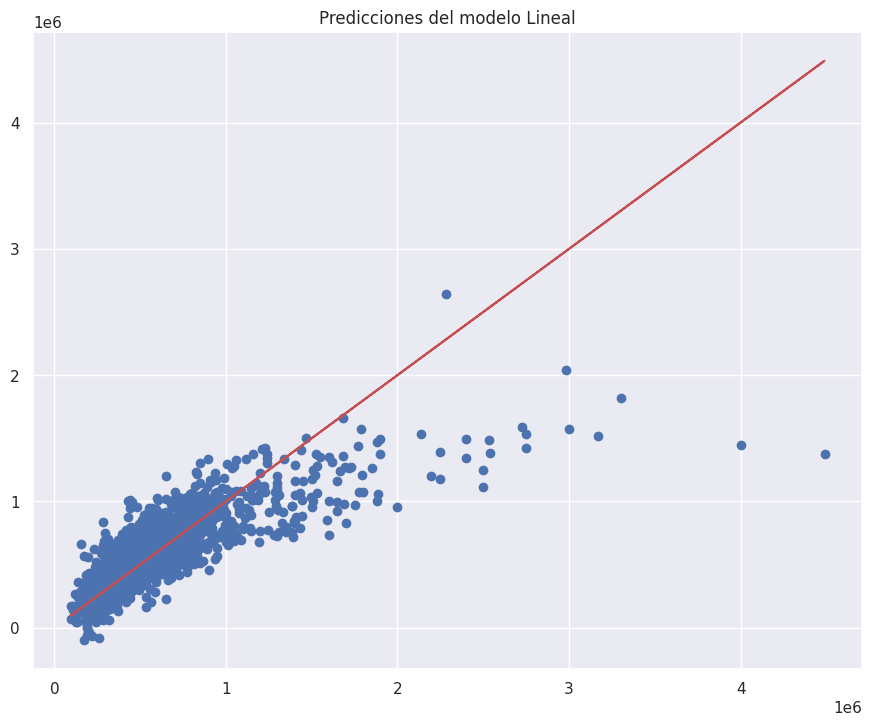

In [70]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,explained_variance_score
from sklearn.metrics import classification_report,confusion_matrix
print('MAE: ',mean_absolute_error(y_test,y_pred))
print('MSE: ',mean_squared_error(y_test,y_pred))
print('RMSE: ',np.sqrt(mean_squared_error(y_test,y_pred)))
print('Puntaje de Varianza (dispersion entre mi prediccion y mis resultados reales' ,explained_variance_score(y_test,y_pred))

print('\n\nDescriptive Statistics:\n',df['price'].describe())
plt.scatter(y_test,y_pred)
plt.title("Predicciones del modelo Lineal")
plt.plot(y_test,y_test,'r')
plt.show()

<ipython-input-71-2285f26279e0>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(errors)


<Axes: xlabel='price', ylabel='Density'>

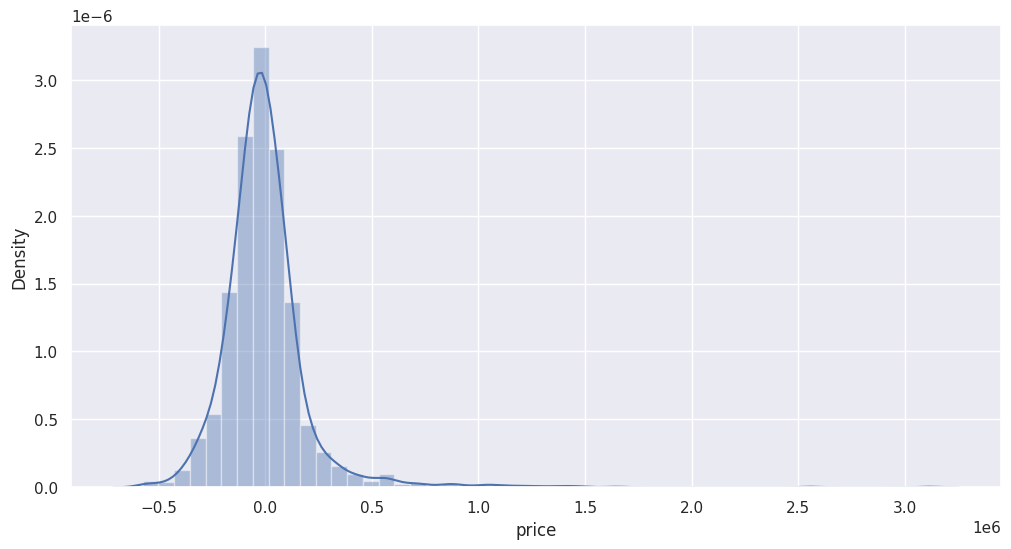

In [71]:
errors = y_test - y_pred.flatten()
plt.figure(figsize=(12,6))
sns.distplot(errors)